In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Underfitted Model:
- The model is too simple to capture the underlying trend of the data.
- The model has high bias and low variance.

Overfitted Model:
- The model is too complex and captures the noise in the data.
- The model has low bias and high variance.
- What can we do to reduce overfitting?
    - Get more data (not always possible)
    - Use a simpler model
    - Add regularization to your model (penalize large weights)

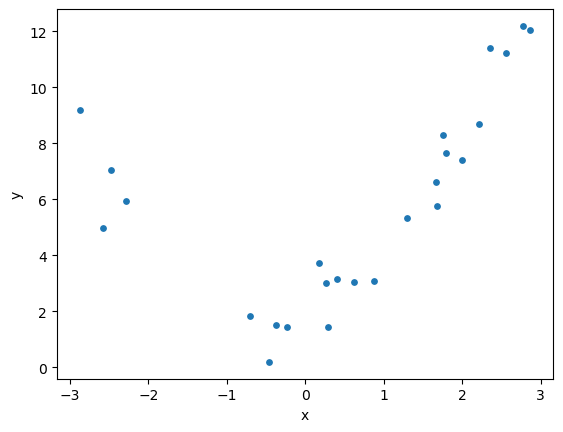

In [13]:
# generate data based on y=x^2+x+2 with some noise
np.random.seed(0)
m = 25 # number of samples / data points
x = 6*np.random.rand(m, 1)-3
y = 2 + x + x**2 + np.random.randn(m, 1)

# plot the data
plt.scatter(x,y,s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [31]:
# # fit a polynomial of degree 2 to the data
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # transform the data to include another axis
# x_new = np.linspace(-3, 3, 100).reshape(100, 1)
# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# x_poly = poly_features.fit_transform(x)
# x_new_poly = poly_features.transform(x_new)

# # fit the transformed data to Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(x_poly, y)
# y_new = lin_reg.predict(x_new_poly)

# # plot the data and the fitted curve
# plt.scatter(x,y,s=15)
# plt.plot(x_new, y_new, color='r')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

Fitting the model: under and over

Train MSE: 0.7956
Test MSE: 0.9433


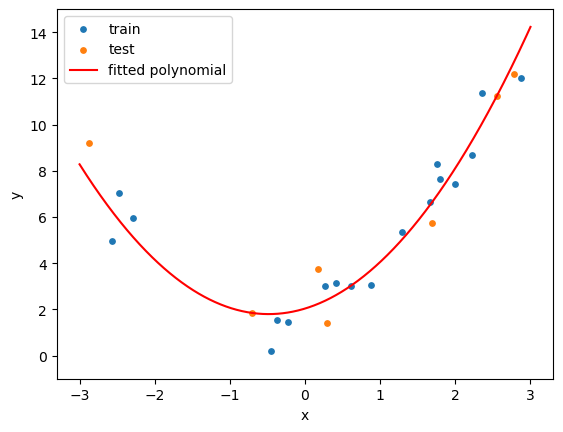

In [62]:
# fit a polynomial of degree 2 to the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# fit a polynomial to the data
degree = 2 # we will try 1 (underfit), 2 (good fit), and 25 (overfit)

pipe_reg = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

pipe_reg.fit(x_train, y_train)

# compute mean squared error on training and test sets
y_train_pred = pipe_reg.predict(x_train)
y_test_pred = pipe_reg.predict(x_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Train MSE: %.4f' % train_error)
print('Test MSE: %.4f' % test_error)

# plot the data and the fitted curve
plt.scatter(x_train,y_train,s=15, label='train')
plt.scatter(x_test,y_test,s=15, label='test')
x_plot = np.linspace(-3, 3, 1000).reshape(1000, 1)
y_plot = pipe_reg.predict(x_plot)
plt.plot(x_plot, y_plot, color='r', label='fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-1, 15)
plt.show()

Test vs Train Error:

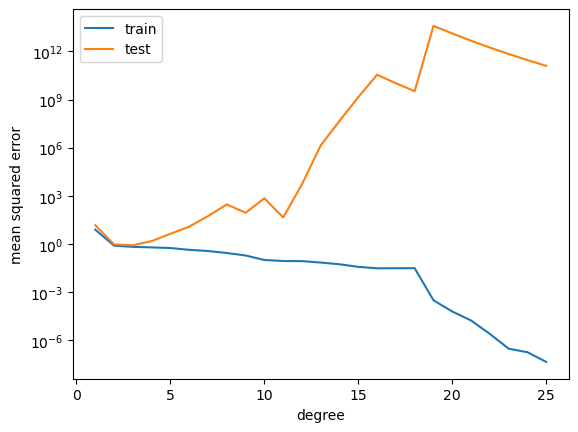

In [64]:
# plot mean squared error vs. degree
degrees = np.arange(1, 26)
train_errors = []
test_errors = []

for degree in degrees:
    pipe_reg['poly_features'].degree = degree
    pipe_reg.fit(x_train, y_train)
    y_train_pred = pipe_reg.predict(x_train)
    y_test_pred = pipe_reg.predict(x_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.semilogy(degrees, train_errors, label='train')
plt.semilogy(degrees, test_errors, label='test')
plt.xlabel('degree')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

# plt.plot(degrees, train_errors, label='train')
# plt.plot(degrees, test_errors, label='test')
# plt.xlabel('degree')
# plt.ylabel('mean squared error')
# plt.ylim(0, 20)
# plt.legend()
# plt.show()

How can we have a good fit with high degree polynomial?

### Regularization
- Ridge Regression (L2 Regularization)
- Lasso Regression (L1 Regularization)

#### Ridge Regression
- Minimizes the MSE + a penalty term for each feature
- Penalty term is the sum of the squared value of each coefficient multiplied by some constant alpha
- looks like this: $\alpha\sum_{i=1}^{n}\theta_i^2$
    - where $\alpha$ is the regularization strength
    - and $\theta_i$ is the coefficient for feature i
    - and n is the number of features

#### Lasso Regression
- Minimizes the MSE + a penalty term for each feature
- Penalty term is the sum of the absolute value of each coefficient multiplied by some constant alpha
- looks like this: $\alpha\sum_{i=1}^{n}|\theta_i|$
    - where $\alpha$ is the regularization strength
    - and $\theta_i$ is the coefficient for feature i
    - and n is the number of features

In [67]:
# degree 25 coefficients: quite large
# Large coefficients can lead to overfitting
pipe_reg['lin_reg'].coef_

array([[-7.76595135e+05,  7.22925861e+07, -1.96989064e+09,
         2.28866160e+10, -1.44937584e+11,  5.52087016e+11,
        -1.28318508e+12,  1.65614525e+12, -6.18247657e+11,
        -1.11754466e+12,  9.25420615e+11,  9.88666389e+11,
        -7.71036594e+11, -1.16168574e+12,  3.24840568e+11,
         1.30606725e+12,  3.43697961e+11, -1.15313663e+12,
        -9.98721689e+11,  7.07992561e+11,  1.42624712e+12,
        -3.64262570e+11, -1.77054502e+12,  1.49122290e+12,
        -3.60072625e+11]])

## Ridge and Lasso Regression

In [71]:
from sklearn.linear_model import Ridge, Lasso

Train MSE: 2.9757
Test MSE: 5.5494


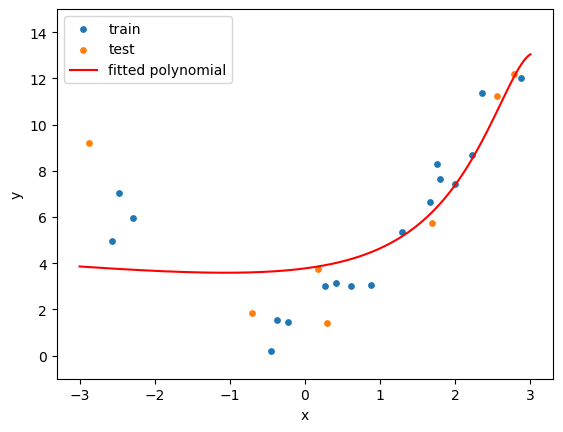

In [81]:
alpha = 1 # alpha=0 is equivalent to linear regression
degree = 25

pipe_reg = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', Ridge(alpha=alpha))
])

pipe_reg.fit(x_train, y_train)

# compute mean squared error on training and test sets
y_train_pred = pipe_reg.predict(x_train)
y_test_pred = pipe_reg.predict(x_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Train MSE: %.4f' % train_error)
print('Test MSE: %.4f' % test_error)

# plot the data and the fitted curve
plt.scatter(x_train,y_train,s=15, label='train')
plt.scatter(x_test,y_test,s=15, label='test')
x_plot = np.linspace(-3, 3, 1000).reshape(1000, 1)
y_plot = pipe_reg.predict(x_plot)
plt.plot(x_plot, y_plot, color='r', label='fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-1, 15)
plt.show()

Train MSE: 0.8167
Test MSE: 1.7119


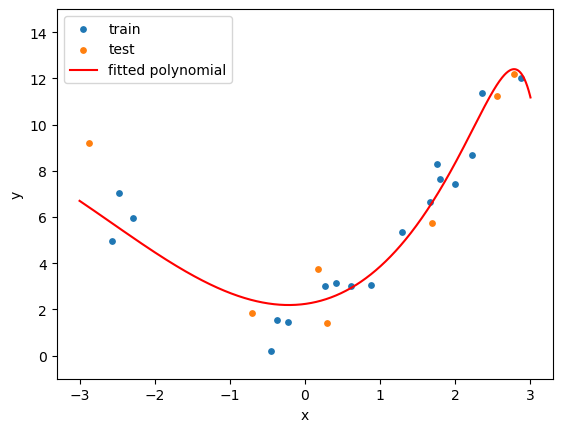

In [85]:
alpha = 0.01 # alpha=0 is equivalent to linear regression
degree = 25

pipe_reg = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', Lasso(alpha=alpha))
])

pipe_reg.fit(x_train, y_train)

# compute mean squared error on training and test sets
y_train_pred = pipe_reg.predict(x_train)
y_test_pred = pipe_reg.predict(x_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print('Train MSE: %.4f' % train_error)
print('Test MSE: %.4f' % test_error)

# plot the data and the fitted curve
plt.scatter(x_train,y_train,s=15, label='train')
plt.scatter(x_test,y_test,s=15, label='test')
x_plot = np.linspace(-3, 3, 1000).reshape(1000, 1)
y_plot = pipe_reg.predict(x_plot)
plt.plot(x_plot, y_plot, color='r', label='fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-1, 15)
plt.show()